# **Face Mask Detection Assignment**
* Detect Face Mask with CNN model.

######  **MIT License**

**Copyright (c) 2021 Tapendu Karmakar**

**Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:**

**The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.**

**THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.**


### Import Important Libraries

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,Dense,Dropout,Flatten,MaxPool2D
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.layers.experimental.preprocessing \
import RandomFlip,RandomRotation,Rescaling,RandomContrast

### Import Train Data

In [3]:
train_df = image_dataset_from_directory('Train/',
                                       labels='inferred',
                                       label_mode='binary',
                                       interpolation='nearest',
                                       image_size=[128,128],
                                       batch_size=32,
                                       shuffle=True,
                                       )

Found 10000 files belonging to 2 classes.


### Import Validation Data

In [4]:
valid_df = image_dataset_from_directory('Validation/',
                                       labels='inferred',
                                       label_mode='binary',
                                       interpolation='nearest',
                                       image_size=[128,128],
                                       batch_size=32,
                                       shuffle=True,
                                       )

Found 800 files belonging to 2 classes.


### Import Test Data

In [5]:
test_df = image_dataset_from_directory('Test/',
                                       labels='inferred',
                                       label_mode='binary',
                                       interpolation='nearest',
                                       image_size=[128,128],
                                       batch_size=32,
                                       shuffle=True,
                                       )

Found 992 files belonging to 2 classes.


#### Storing the Class names in a List

In [6]:
class_name = train_df.class_names

### Lets See Some Train Data Images

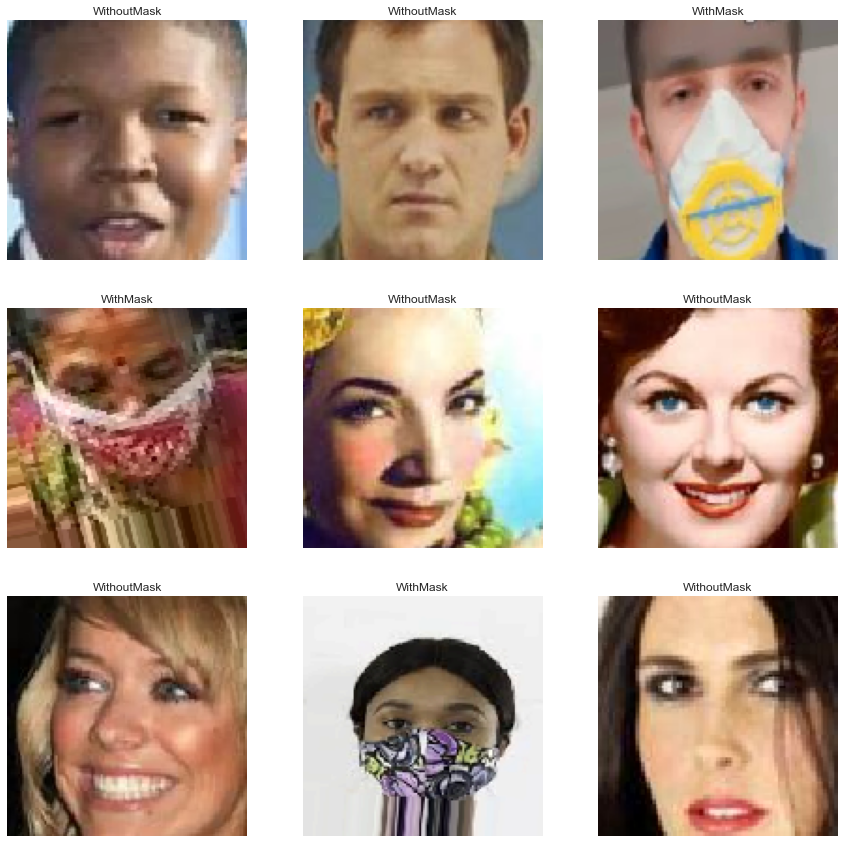

In [7]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-dark')

plt.figure(figsize=(15,15))
for img, label in train_df.take(1):
    for i in range(9):
        ax = plt.subplot(3,3,i+1)
        plt.imshow(img[i].numpy().astype('uint8'))
        plt.title(class_name[int(label[i])])
        plt.axis('off')

#### Autotune the all the dataset

    AUTOTUNE = tf.data.AUTOTUNE

    train_df = train_df.cache().prefetch(buffer_size=AUTOTUNE)
    valid_df = valid_df.cache().prefetch(buffer_size=AUTOTUNE)
    test_df = test_df.cache().prefetch(buffer_size=AUTOTUNE)

### Convolutional Neural Network Layers

    model = Sequential([
    Rescaling(1.0/255,input_shape=(128,128,3)),
    RandomFlip(),
    RandomRotation(0.4),
    RandomContrast(0.3),
    
    # First Layer
    layers.Conv2D(filters=64, kernel_size=5, activation='relu',padding='same'),
    layers.MaxPool2D(),
    
    # Second Layer
    layers.Conv2D(filters=128, kernel_size=5, activation='relu',padding='same'),
    layers.MaxPool2D(),
    
    # Third Layer
    layers.Conv2D(filters=128, kernel_size=5, activation='relu',padding='same'),
    layers.MaxPool2D(),
    
    # Forth Layer
    layers.Conv2D(filters=128, kernel_size=5, activation='relu',padding='same'),
    layers.MaxPool2D(),
    
    # Fivth Layer
    layers.Conv2D(filters=128, kernel_size=5, activation='relu',padding='same'),
    layers.MaxPool2D(),
    layers.Dropout(0.2),
    
    # Classifier Head
    layers.Flatten(),
    layers.Dense(units=6,activation='relu'),
    layers.Dense(units=1,activation='sigmoid')
    
    ])

    model.compile(
    optimizer=tf.optimizers.Adam(epsilon=0.02),
    loss='binary_crossentropy',
    metrics=['binary_accuracy'],
    )

### Fitting the Model

    history = model.fit(train_df,
                   validation_data=valid_df,
                   epochs=50,
                   batch_size=32,
                   )

### Lets see the Accuracy and Loss

    import pandas as pd
    hist_df = pd.DataFrame(history.history)
    hist_df.loc[:,['loss','val_loss']].plot()
    hist_df.loc[:,['binary_accuracy','val_binary_accuracy']].plot()

### Save the Model

    model.save('face_detection.h5')

### Creating a function which return predictions

In [8]:
model = tf.keras.models.load_model('face_detection.h5')

In [9]:
def get_class(img):
    img_arr = keras.preprocessing.image.img_to_array(img)
    img_arr = tf.expand_dims(img_arr, 0)
    pred = model.predict(img_arr)
    pred = (pred>0.5).astype(np.int)
    return class_name[pred[0][0]]

### Lets See the Predicted Results

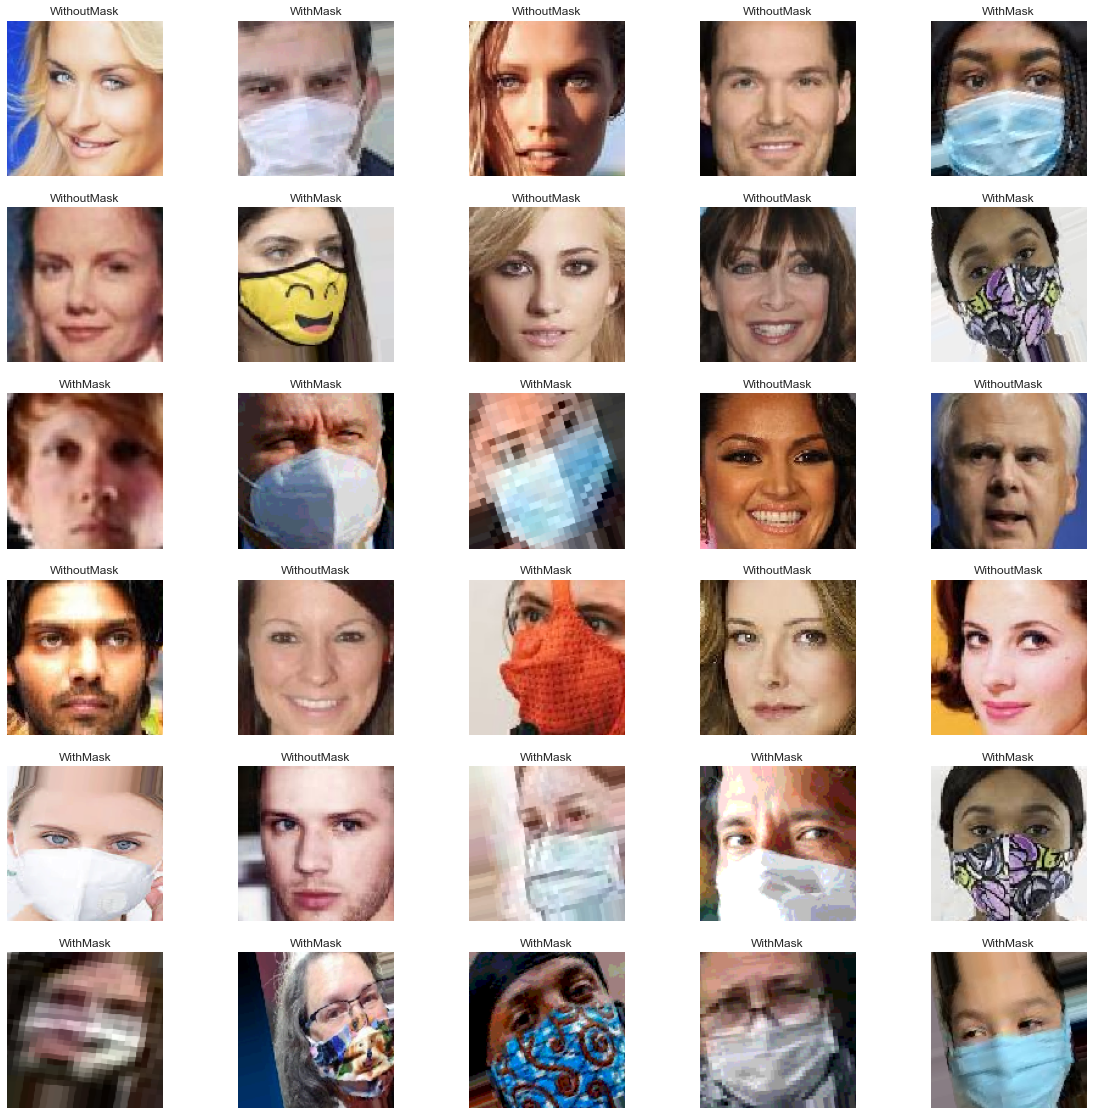

In [10]:
plt.figure(figsize=(20,20))
for img , _ in test_df.take(5):
    for i in range(30):
        ax = plt.subplot(6,5,i+1)
        plt.imshow(img[i])
        plt.title(get_class(img[i]))
        plt.axis('off')

## **Thank You for Giving Your Time**